# Intro

## Importar

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/orga/04 - Organización de Datos/TP2/train_cleaned.parq')
X_test_original = pd.read_parquet('/content/drive/MyDrive/orga/04 - Organización de Datos/TP2/test.parq')

Divido el DataFrame en batches de 100k. Luego le aplico drop_duplicates a cada batch. Finalmente uno todo el DF.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40671582 entries, 0 to 40671581
Data columns (total 13 columns):
 #   Column             Dtype   
---  ------             -----   
 0   watcher_country    category
 1   watcher_as_num     float32 
 2   watcher_as_name    category
 3   attacker_country   category
 4   attacker_as_num    float32 
 5   attacker_as_name   category
 6   attack_type        object  
 7   watcher_uuid_enum  int32   
 8   attacker_ip_enum   int32   
 9   label              int8    
 10  service_type       object  
 11  hour               int64   
 12  day                int64   
dtypes: category(4), float32(2), int32(2), int64(2), int8(1), object(2)
memory usage: 2.2+ GB


In [ ]:
df

,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day
0,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,exploit,0,6466,0,http,7,0
1,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,spam,0,6466,0,http,7,0
2,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,bruteforce,2,4637,0,http,7,0
3,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,spam,2,4637,0,http,7,0
4,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,exploit,2,4637,0,http,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40671577,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,scan,9606,191439,0,http,21,3
40671578,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,exploit,9606,191439,0,http,21,3
40671579,DE,12897.0,ENTEGA Medianet GmbH,DE,3209.0,Vodafone GmbH,scan,24879,190784,0,http,21,3
40671580,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,scan,40383,193446,0,http,21,3


## Limpieza en df

df_ tiene mitad label 1 y mitad label 0. Se dropean las columnas as num ya que representan lo mismo que las as name

In [ ]:
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

In [ ]:
random.seed(13)
sample_size = len(df_1)
df_ = df_0.sample(sample_size, random_state=13)

df_ = pd.concat([df_, df_1], ignore_index=True)

In [ ]:
df_ = df_.drop('attacker_as_num', axis=1)
df_ = df_.drop('watcher_as_num', axis=1)

In [ ]:
df_

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day
0,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,spam,24879,51954,0,http,21,2
1,US,IMH-IAD,US,TWC-10796-MIDWEST,scan,12159,177970,0,http,23,4
2,FR,OVH SAS,US,WOW,spam,30072,130743,0,http,0,0
3,US,UNIFIEDLAYER-AS-1,US,Delis LLC,spam,46212,87100,0,http,8,3
4,SG,GOOGLE,SG,AMAZON-02,scan,307,78586,0,http,5,0
...,...,...,...,...,...,...,...,...,...,...,...
1445861,DE,Strato AG,SG,DIGITALOCEAN-ASN,scan,25180,193313,1,http,21,3
1445862,US,LIQUIDWEB,US,QUINTEX,exploit,25685,198558,1,http,21,3
1445863,US,LIQUIDWEB,US,QUINTEX,spam,25685,198558,1,http,21,3
1445864,DK,One.com A/S,SG,DIGITALOCEAN-ASN,scan,24258,193313,1,http,21,3


## Limpieza en test

In [ ]:
X_test = X_test_original.copy()

In [ ]:
X_test[['service_type', 'attack_type']] =  X_test['attack_type'].str.split(':', 1, expand=True)

<ipython-input-11-b969b2c37afb>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  X_test[['service_type', 'attack_type']] =  X_test['attack_type'].str.split(':', 1, expand=True)


In [ ]:
X_test['attack_time'] = pd.to_datetime(X_test['attack_time'])

In [ ]:
X_test = X_test.drop('attacker_as_num', axis=1)
X_test = X_test.drop('watcher_as_num', axis=1)

In [ ]:
X_test['hour'] = X_test['attack_time'].dt.hour
X_test['day'] = X_test['attack_time'].map(lambda x: x.weekday())

In [ ]:
X_test = X_test.drop(columns=['attack_time'])

In [ ]:
if X_test['watcher_country'].isna().any():
    X_test['watcher_country'] = X_test['watcher_country'].cat.add_categories("unknown")
    X_test['watcher_country'].fillna("unknown", inplace=True)
if X_test['watcher_as_name'].isna().any():
    X_test['watcher_as_name'] = X_test['watcher_as_name'].cat.add_categories("unknown")
    X_test['watcher_as_name'].fillna("unknown", inplace=True)
if X_test['attacker_country'].isna().any():
    X_test['attacker_country'] = X_test['attacker_country'].cat.add_categories("unknown")
    X_test['attacker_country'].fillna("unknown", inplace=True)
if X_test['attacker_as_name'].isna().any():
    X_test['attacker_as_name'] = X_test['attacker_as_name'].cat.add_categories("unknown")
    X_test['attacker_as_name'].fillna("unknown", inplace=True)

In [ ]:
X_test.count()

watcher_country      18682297
watcher_as_name      18682297
attacker_country     18682297
attacker_as_name     18682297
attack_type          18682297
watcher_uuid_enum    18682297
attacker_ip_enum     18682297
service_type         18682297
hour                 18682297
day                  18682297
dtype: int64

# Featuring

## Feature Watcher Country

recategorizo los paises por:


1.   Si es USA
2.   Si está en el top 5 de los label 1
3.   Si está en el top 10 de los label 1

En este caso, solo se diferencia de un país en el top 10

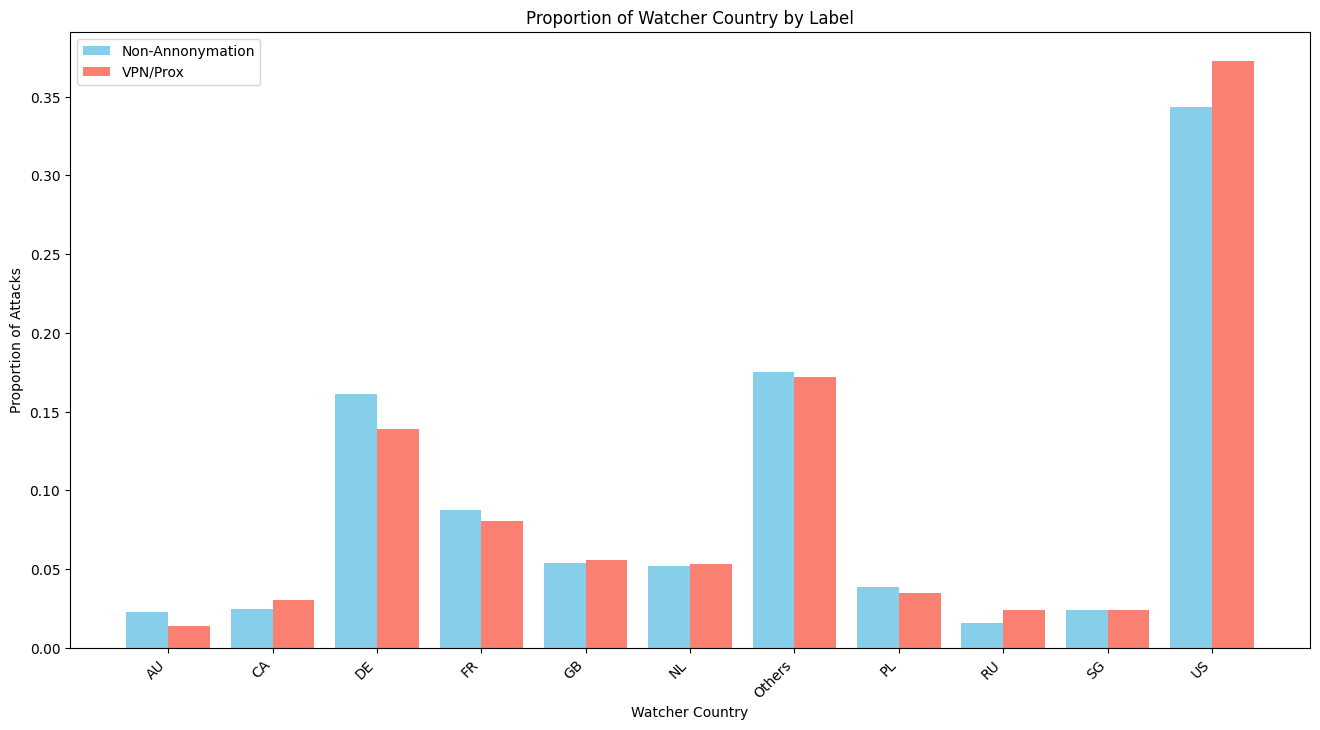


In [ ]:
df_1 = df_[df_['label'] == 1]

In [ ]:
df_0 = df_[df_['label'] == 0]

In [ ]:
us = ['US']
top_5 = df_1['watcher_country'].value_counts().nlargest(5).index
top_10 = df_1['watcher_country'].value_counts().nlargest(10).index

In [ ]:
list(top_5)

['US', 'DE', 'FR', 'GB', 'NL']

In [ ]:
list(top_10)

['US', 'DE', 'FR', 'GB', 'NL', 'PL', 'CA', 'SG', 'RU', 'BE']

In [ ]:
top_5_0 = df_0['watcher_country'].value_counts().nlargest(5).index
top_10_0 = df_0['watcher_country'].value_counts().nlargest(10).index

In [ ]:
list(top_5_0)

['US', 'DE', 'FR', 'GB', 'NL']

In [ ]:
list(top_10_0)

['US', 'DE', 'FR', 'GB', 'NL', 'PL', 'CA', 'SG', 'AU', 'RU']

In [ ]:
def categorize_country(x):
    if x in us:
        return 1
    elif x in top_5 and x not in us:
        return 2
    elif x in top_10 and x not in top_5:
        return 3
    else:
        return 4

In [ ]:
df_['watcher_country'] = df_['watcher_country'].apply(categorize_country)

In [ ]:
X_test['watcher_country'] = X_test['watcher_country'].apply(categorize_country)

## Feature Attacker Country

recategorizo los paises por:


1.   Si es USA
2.   Si está en el top 5 de los label 1
3.   Si está en el top 10 de los label 1

En este caso, hay diferencias significativas en los top attacker country de cada label. Por ejemplo, en el caso de CA, en los label 1 representa mas del 12% de los ataques, mientras que en el label 0 menos del 5%.

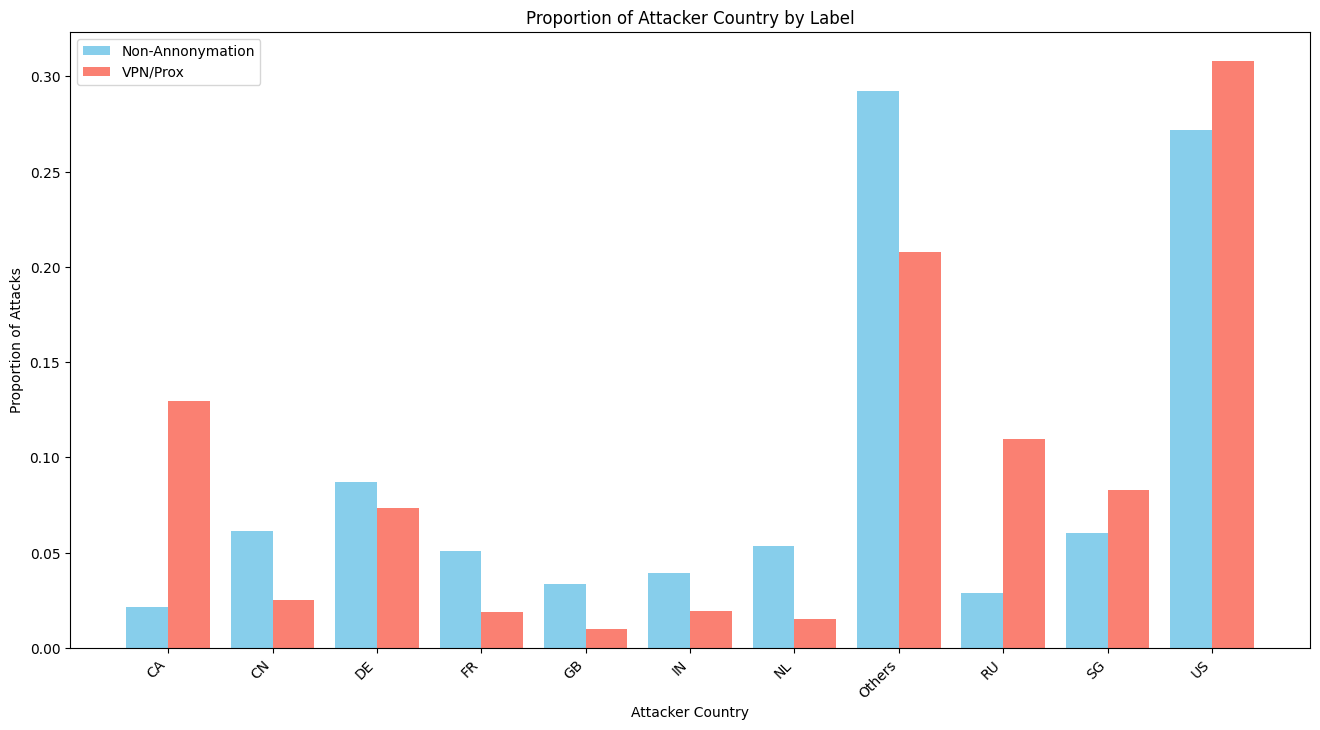


In [ ]:
us = ['US']
top_5 = df_1['attacker_country'].value_counts().nlargest(5).index
top_10 = df_1['attacker_country'].value_counts().nlargest(10).index

In [ ]:
list(top_5)

['US', 'CA', 'RU', 'SG', 'DE']

In [ ]:
list(top_10)

['US', 'CA', 'RU', 'SG', 'DE', 'AU', 'CN', 'IN', 'FR', 'NL']

In [ ]:
top_5_0 = df_0['attacker_country'].value_counts().nlargest(5).index
top_10_0 = df_0['attacker_country'].value_counts().nlargest(10).index

In [ ]:
list(top_5_0)

['US', 'DE', 'CN', 'SG', 'NL']

In [ ]:
list(top_10_0)

['US', 'DE', 'CN', 'SG', 'NL', 'FR', 'IN', 'GB', 'RU', 'VN']

In [ ]:
def categorize_country(x):
    if x in us:
        return 1
    elif x in top_5 and x not in us:
        return 2
    elif x in top_10 and x not in top_5:
        return 3
    else:
        return 4

In [ ]:
df_['attacker_country'] = df_['attacker_country'].apply(categorize_country)

In [ ]:
X_test['attacker_country'] = X_test['attacker_country'].apply(categorize_country)

## Feature hour

Agrupo la hora en rangos de acuerdo a la mayor cantidad de ataques en el label 1

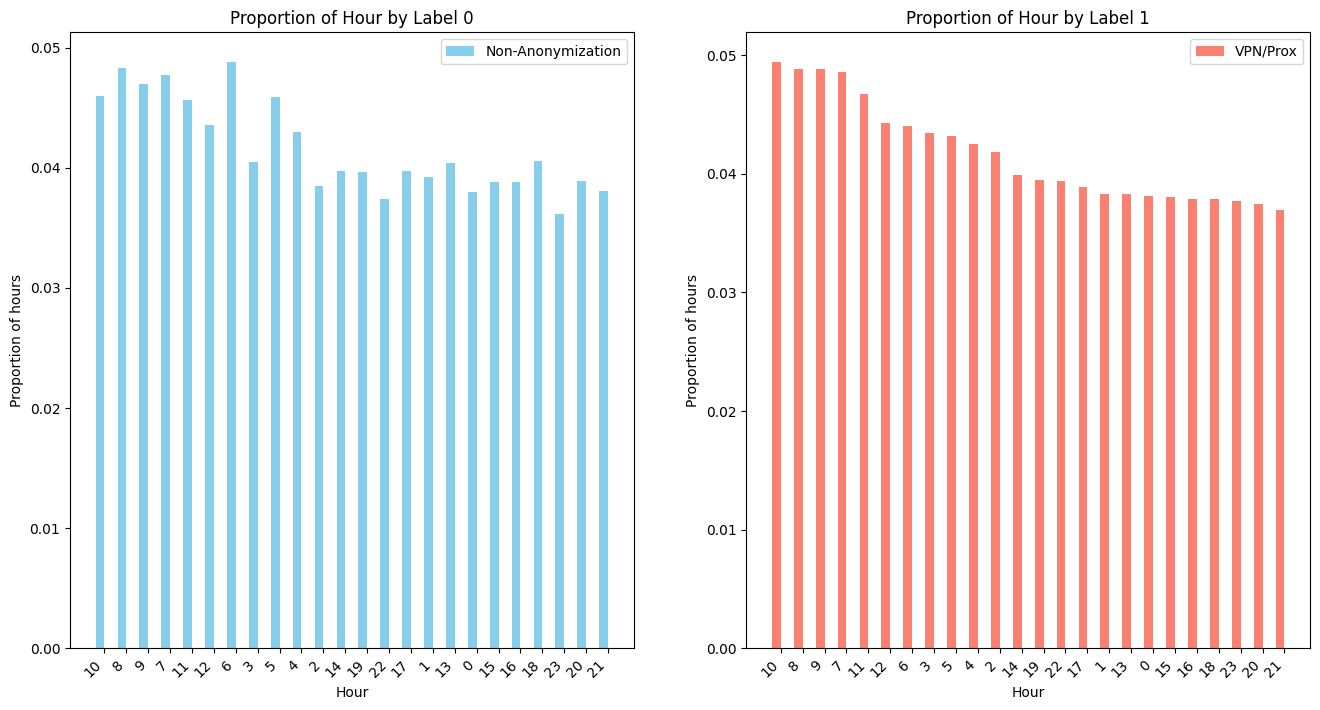

In [ ]:
top_6 = df_1['hour'].value_counts().nlargest(6).index
top_12 = df_1['hour'].value_counts().nlargest(12).index
top_18 = df_1['hour'].value_counts().nlargest(18).index
top_24 = df_1['hour'].value_counts().nlargest(24).index

list(top_24)

[10,
 8,
 9,
 7,
 11,
 12,
 6,
 3,
 5,
 4,
 2,
 14,
 19,
 22,
 17,
 1,
 13,
 0,
 15,
 16,
 18,
 23,
 20,
 21]

In [ ]:
def asignar_valor(hour):
    if hour in top_6:
        return 0
    elif hour in top_12 and not hour in top_6:
        return 1
    elif hour in top_18 and not hour in top_12:
        return 2
    elif hour in top_24 and not hour in top_18:
        return 3
    else:
        return None

df_['hour'] = df_['hour'].apply(asignar_valor)
X_test['hour'] = X_test['hour'].apply(asignar_valor)

In [ ]:
df_

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day
0,2,ENTEGA Medianet GmbH,2,Deutsche Telekom AG,spam,24879,51954,0,http,3,2
1,1,IMH-IAD,1,TWC-10796-MIDWEST,scan,12159,177970,0,http,3,4
2,2,OVH SAS,1,WOW,spam,30072,130743,0,http,2,0
3,1,UNIFIEDLAYER-AS-1,1,Delis LLC,spam,46212,87100,0,http,0,3
4,3,GOOGLE,2,AMAZON-02,scan,307,78586,0,http,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1445861,2,Strato AG,2,DIGITALOCEAN-ASN,scan,25180,193313,1,http,3,3
1445862,1,LIQUIDWEB,1,QUINTEX,exploit,25685,198558,1,http,3,3
1445863,1,LIQUIDWEB,1,QUINTEX,spam,25685,198558,1,http,3,3
1445864,4,One.com A/S,2,DIGITALOCEAN-ASN,scan,24258,193313,1,http,3,3


## Feature attack type

Me quedo con los 4 ataques mas comunes determinados por el visus frequencia de attaque por label

In [ ]:
top_attack_type = df_['attack_type'].value_counts().nlargest(4).index

In [ ]:
df_['attack_type'] = pd.Categorical(df_['attack_type'], categories=top_attack_type, ordered=True)
df_['attack_type'] = pd.Categorical(df_['attack_type'].cat.add_categories("other"))
df_['attack_type'] = df_['attack_type'].fillna("other")

In [ ]:
X_test['attack_type'] = pd.Categorical(X_test['attack_type'], categories=top_attack_type, ordered=True)
X_test['attack_type'] = pd.Categorical(X_test['attack_type'].cat.add_categories("other"))
X_test['attack_type'] = X_test['attack_type'].fillna("other")

In [ ]:
df_

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day
0,2,ENTEGA Medianet GmbH,2,Deutsche Telekom AG,spam,24879,51954,0,http,3,2
1,1,IMH-IAD,1,TWC-10796-MIDWEST,scan,12159,177970,0,http,3,4
2,2,OVH SAS,1,WOW,spam,30072,130743,0,http,2,0
3,1,UNIFIEDLAYER-AS-1,1,Delis LLC,spam,46212,87100,0,http,0,3
4,3,GOOGLE,2,AMAZON-02,scan,307,78586,0,http,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1445861,2,Strato AG,2,DIGITALOCEAN-ASN,scan,25180,193313,1,http,3,3
1445862,1,LIQUIDWEB,1,QUINTEX,exploit,25685,198558,1,http,3,3
1445863,1,LIQUIDWEB,1,QUINTEX,spam,25685,198558,1,http,3,3
1445864,4,One.com A/S,2,DIGITALOCEAN-ASN,scan,24258,193313,1,http,3,3


## Feature service type

Me quedo con el top 2 de servicios y agrupo los otros en una nueva categoría

In [ ]:
top_service_type = df_['service_type'].value_counts().nlargest(2).index

In [ ]:
df_['service_type'] = pd.Categorical(df_['service_type'], categories=top_service_type, ordered=True)
df_['service_type'] = pd.Categorical(df_['service_type'].cat.add_categories("other"))
df_['service_type'] = df_['service_type'].fillna("other")

In [ ]:
X_test['service_type'] = pd.Categorical(X_test['service_type'], categories=top_service_type, ordered=True)
X_test['service_type'] = pd.Categorical(X_test['service_type'].cat.add_categories("other"))
X_test['service_type'] = X_test['service_type'].fillna("other")

In [ ]:
df_

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day
0,2,ENTEGA Medianet GmbH,2,Deutsche Telekom AG,spam,24879,51954,0,http,3,2
1,1,IMH-IAD,1,TWC-10796-MIDWEST,scan,12159,177970,0,http,3,4
2,2,OVH SAS,1,WOW,spam,30072,130743,0,http,2,0
3,1,UNIFIEDLAYER-AS-1,1,Delis LLC,spam,46212,87100,0,http,0,3
4,3,GOOGLE,2,AMAZON-02,scan,307,78586,0,http,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1445861,2,Strato AG,2,DIGITALOCEAN-ASN,scan,25180,193313,1,http,3,3
1445862,1,LIQUIDWEB,1,QUINTEX,exploit,25685,198558,1,http,3,3
1445863,1,LIQUIDWEB,1,QUINTEX,spam,25685,198558,1,http,3,3
1445864,4,One.com A/S,2,DIGITALOCEAN-ASN,scan,24258,193313,1,http,3,3


## Feature attacker AS name

In [ ]:
df_1 = df_[df_['label'] == 1]

In [ ]:
top_countries = df_1['watcher_as_name'].value_counts().nlargest(20).index

In [ ]:
df_['watcher_as_name'] = df_['watcher_as_name'].apply(lambda x: 'top' if x in top_countries else 'other')
X_test['watcher_as_name'] = X_test['watcher_as_name'].apply(lambda x: 'top' if x in top_countries else 'other')

## Feature watcher AS name

In [ ]:
df_1 = df_[df_['label'] == 1]

In [ ]:
top_countries = df_1['attacker_as_name'].value_counts().nlargest(20).index

In [ ]:
df_['attacker_as_name'] = df_['attacker_as_name'].apply(lambda x: 'top' if x in top_countries else 'other')
X_test['attacker_as_name'] = X_test['attacker_as_name'].apply(lambda x: 'top' if x in top_countries else 'other')

# Enconding

## División de dfs

In [ ]:
X = df_.drop('label', axis=1)
y = df_['label']

In [ ]:
unique_ips = X['attacker_ip_enum'].unique()
pd.DataFrame(unique_ips).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70954 entries, 0 to 70953
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       70954 non-null  int32
dtypes: int32(1)
memory usage: 277.3 KB


In [ ]:
ips_train, ips_validation = train_test_split(unique_ips, test_size=0.3, random_state=13)

In [ ]:
X_train = X[X['attacker_ip_enum'].isin(ips_train)]
X_validation = X[X['attacker_ip_enum'].isin(ips_validation)]

y_train = y[X_train.index]
y_validation = y[X_validation.index]

In [ ]:
pip install category_encoders

In [ ]:
X_train

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,service_type,hour,day
0,2,other,2,other,spam,24879,51954,http,3,2
1,1,top,1,other,scan,12159,177970,http,3,4
2,2,top,1,other,spam,30072,130743,http,2,0
4,3,other,2,other,scan,307,78586,http,1,0
10,3,other,4,other,spam,5084,108027,http,1,5
...,...,...,...,...,...,...,...,...,...,...
1445861,2,other,2,top,scan,25180,193313,http,3,3
1445862,1,top,1,other,exploit,25685,198558,http,3,3
1445863,1,top,1,other,spam,25685,198558,http,3,3
1445864,4,other,2,top,scan,24258,193313,http,3,3


In [ ]:
X_test

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,service_type,hour,day
0,1,top,3,top,spam,1,7696,http,0,0
1,1,top,3,top,exploit,1,7696,http,0,0
2,1,top,3,top,bruteforce,1,7696,http,0,0
3,1,top,3,top,bruteforce,1,7696,http,0,0
4,1,top,1,top,bruteforce,3,7543,http,0,0
...,...,...,...,...,...,...,...,...,...,...
18682292,2,other,2,other,scan,24879,198081,http,3,3
18682293,2,other,2,other,scan,24879,198081,http,3,3
18682294,2,other,2,other,scan,24879,198081,http,3,3
18682295,2,other,2,other,scan,24879,198081,http,3,3


In [ ]:
ips = X_train['attacker_ip_enum']
ips_validation = X_validation['attacker_ip_enum']

In [ ]:
X_train = X_train.drop('attacker_ip_enum', axis=1)
X_validation = X_validation.drop('attacker_ip_enum', axis=1)

In [ ]:
ips_test = X_test['attacker_ip_enum']
X_test = X_test.drop('attacker_ip_enum', axis=1)

In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_validation.reset_index(drop=True, inplace=True)

## Mean de Watcher country uuid enum

In [ ]:
from category_encoders import TargetEncoder
import category_encoders as ce

In [ ]:
y_train.reset_index(drop=True, inplace=True)
y_validation.reset_index(drop=True, inplace=True)

In [ ]:
target_encoder = TargetEncoder(cols=['watcher_uuid_enum'])
X_train = target_encoder.fit_transform(X_train, y_train)
X_validation = target_encoder.transform(X_validation)
X_test = target_encoder.transform(X_test)

In [ ]:
X_train

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,service_type,hour,day
0,2,other,2,other,spam,0.130088,http,3,2
1,1,top,1,other,scan,0.024692,http,3,4
2,2,top,1,other,spam,0.367630,http,2,0
3,3,other,2,other,scan,0.135243,http,1,0
4,3,other,4,other,spam,0.276497,http,1,5
...,...,...,...,...,...,...,...,...,...
1037634,2,other,2,top,scan,0.833631,http,3,3
1037635,1,top,1,other,exploit,0.944042,http,3,3
1037636,1,top,1,other,spam,0.944042,http,3,3
1037637,4,other,2,top,scan,0.816568,http,3,3


In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

## One hot de top 10 attacker_country



In [ ]:
X_train

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,service_type,hour,day
0,2,other,2,other,spam,0.130088,http,3,2
1,1,top,1,other,scan,0.024692,http,3,4
2,2,top,1,other,spam,0.367630,http,2,0
3,3,other,2,other,scan,0.135243,http,1,0
4,3,other,4,other,spam,0.276497,http,1,5
...,...,...,...,...,...,...,...,...,...
1037634,2,other,2,top,scan,0.833631,http,3,3
1037635,1,top,1,other,exploit,0.944042,http,3,3
1037636,1,top,1,other,spam,0.944042,http,3,3
1037637,4,other,2,top,scan,0.816568,http,3,3


In [ ]:
#binary_encoder = ce.BinaryEncoder(cols=['attacker_country'])

encoded_attacker_country = onehot_encoder.fit_transform(X_train[['attacker_country']]).astype('int8')
encoded_attacker_country_validation = onehot_encoder.transform(X_validation[['attacker_country']]).astype('int8')
encoded_attacker_country_test = onehot_encoder.transform(X_test[['attacker_country']]).astype('int8')

encoded_attacker_country_df = pd.DataFrame(encoded_attacker_country).add_prefix('attacker_country')
encoded_attacker_country_validation_df = pd.DataFrame(encoded_attacker_country_validation).add_prefix('attacker_country')
encoded_attacker_country_test_df = pd.DataFrame(encoded_attacker_country_test).add_prefix('attacker_country')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_attacker_country_df

,attacker_country0,attacker_country1,attacker_country2,attacker_country3
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
1037634,0,1,0,0
1037635,1,0,0,0
1037636,1,0,0,0
1037637,0,1,0,0


In [ ]:
X_train = X_train.join(encoded_attacker_country_df)
X_validation = X_validation.join(encoded_attacker_country_validation_df)
X_test = X_test.join(encoded_attacker_country_test_df)
X_train

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,service_type,hour,day,attacker_country0,attacker_country1,attacker_country2,attacker_country3
0,2,other,2,other,spam,0.130088,http,3,2,0,1,0,0
1,1,top,1,other,scan,0.024692,http,3,4,1,0,0,0
2,2,top,1,other,spam,0.367630,http,2,0,1,0,0,0
3,3,other,2,other,scan,0.135243,http,1,0,0,1,0,0
4,3,other,4,other,spam,0.276497,http,1,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037634,2,other,2,top,scan,0.833631,http,3,3,0,1,0,0
1037635,1,top,1,other,exploit,0.944042,http,3,3,1,0,0,0
1037636,1,top,1,other,spam,0.944042,http,3,3,1,0,0,0
1037637,4,other,2,top,scan,0.816568,http,3,3,0,1,0,0


In [ ]:
X_train = X_train.drop('attacker_country', axis=1)
X_validation = X_validation.drop('attacker_country', axis=1)
X_test = X_test.drop('attacker_country', axis=1)

In [ ]:
encoded_attacker_country_df = None
encoded_attacker_country_validation_df = None
encoded_attacker_country_test_df = None

## One hot de top 10 Wacther country

In [ ]:
#binary_encoder = ce.BinaryEncoder(cols=['watcher_country'])

encoded_watcher_country = onehot_encoder.fit_transform(X_train[['watcher_country']]).astype('int8')
encoded_watcher_country_validation = onehot_encoder.transform(X_validation[['watcher_country']]).astype('int8')
encoded_watcher_country_test = onehot_encoder.transform(X_test[['watcher_country']]).astype('int8')

encoded_watcher_country_df = pd.DataFrame(encoded_watcher_country).add_prefix('watcher_country')
encoded_watcher_country_validation_df = pd.DataFrame(encoded_watcher_country_validation).add_prefix('watcher_country')
encoded_watcher_country_test_df = pd.DataFrame(encoded_watcher_country_test).add_prefix('watcher_country')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_watcher_country_df

,watcher_country0,watcher_country1,watcher_country2,watcher_country3
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1037634,0,1,0,0
1037635,1,0,0,0
1037636,1,0,0,0
1037637,0,0,0,1


In [ ]:
X_train = X_train.join(encoded_watcher_country_df)
X_validation = X_validation.join(encoded_watcher_country_validation_df)
X_test = X_test.join(encoded_watcher_country_test_df)
X_train

,watcher_country,watcher_as_name,attacker_as_name,attack_type,watcher_uuid_enum,service_type,hour,day,attacker_country0,attacker_country1,attacker_country2,attacker_country3,watcher_country0,watcher_country1,watcher_country2,watcher_country3
0,2,other,other,spam,0.130088,http,3,2,0,1,0,0,0,1,0,0
1,1,top,other,scan,0.024692,http,3,4,1,0,0,0,1,0,0,0
2,2,top,other,spam,0.367630,http,2,0,1,0,0,0,0,1,0,0
3,3,other,other,scan,0.135243,http,1,0,0,1,0,0,0,0,1,0
4,3,other,other,spam,0.276497,http,1,5,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037634,2,other,top,scan,0.833631,http,3,3,0,1,0,0,0,1,0,0
1037635,1,top,other,exploit,0.944042,http,3,3,1,0,0,0,1,0,0,0
1037636,1,top,other,spam,0.944042,http,3,3,1,0,0,0,1,0,0,0
1037637,4,other,top,scan,0.816568,http,3,3,0,1,0,0,0,0,0,1


In [ ]:
X_train = X_train.drop('watcher_country', axis=1)
X_validation = X_validation.drop('watcher_country', axis=1)
X_test = X_test.drop('watcher_country', axis=1)

In [ ]:
encoded_watcher_country_df = None
encoded_watcher_country_validation_df = None
encoded_watcher_country_test_df = None

## One Hot service

In [ ]:
encoded_service_type = onehot_encoder.fit_transform(X_train[['service_type']]).astype('int8')
encoded_service_type_validation = onehot_encoder.transform(X_validation[['service_type']]).astype('int8')
encoded_service_type_test = onehot_encoder.transform(X_test[['service_type']]).astype('int8')

encoded_service_type_df = pd.DataFrame(encoded_service_type).add_prefix('service_type_')
encoded_service_type_validation_df = pd.DataFrame(encoded_service_type_validation).add_prefix('service_type_')
encoded_service_type_test_df = pd.DataFrame(encoded_service_type_test).add_prefix('service_type_')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_service_type_df

,service_type_0,service_type_1,service_type_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1037634,1,0,0
1037635,1,0,0
1037636,1,0,0
1037637,1,0,0


In [ ]:
X_train = X_train.join(encoded_service_type_df)
X_validation = X_validation.join(encoded_service_type_validation_df)
X_test = X_test.join(encoded_service_type_test_df)
X_train

,watcher_as_name,attacker_as_name,attack_type,watcher_uuid_enum,service_type,hour,day,attacker_country0,attacker_country1,attacker_country2,attacker_country3,watcher_country0,watcher_country1,watcher_country2,watcher_country3,service_type_0,service_type_1,service_type_2
0,other,other,spam,0.130088,http,3,2,0,1,0,0,0,1,0,0,1,0,0
1,top,other,scan,0.024692,http,3,4,1,0,0,0,1,0,0,0,1,0,0
2,top,other,spam,0.367630,http,2,0,1,0,0,0,0,1,0,0,1,0,0
3,other,other,scan,0.135243,http,1,0,0,1,0,0,0,0,1,0,1,0,0
4,other,other,spam,0.276497,http,1,5,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037634,other,top,scan,0.833631,http,3,3,0,1,0,0,0,1,0,0,1,0,0
1037635,top,other,exploit,0.944042,http,3,3,1,0,0,0,1,0,0,0,1,0,0
1037636,top,other,spam,0.944042,http,3,3,1,0,0,0,1,0,0,0,1,0,0
1037637,other,top,scan,0.816568,http,3,3,0,1,0,0,0,0,0,1,1,0,0


In [ ]:
X_train = X_train.drop('service_type', axis=1)
X_validation = X_validation.drop('service_type', axis=1)
X_test = X_test.drop('service_type', axis=1)

In [ ]:
encoded_service_type_df = None
encoded_service_type_validation_df = None
encoded_service_type_test_df = None

## One Hot attack type encoding


In [ ]:
encoded_attack_type = onehot_encoder.fit_transform(X_train[['attack_type']]).astype('int8')
encoded_attack_type_validation = onehot_encoder.transform(X_validation[['attack_type']]).astype('int8')
encoded_attack_type_test = onehot_encoder.transform(X_test[['attack_type']]).astype('int8')

encoded_attack_type_df = pd.DataFrame(encoded_attack_type).add_prefix('attack_type_')
encoded_attack_type_validation_df = pd.DataFrame(encoded_attack_type_validation).add_prefix('attack_type_')
encoded_attack_type_test_df = pd.DataFrame(encoded_attack_type_test).add_prefix('attack_type_')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_attack_type_df

,attack_type_0,attack_type_1,attack_type_2,attack_type_3,attack_type_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,0,1
...,...,...,...,...,...
1037634,0,0,0,1,0
1037635,0,1,0,0,0
1037636,0,0,0,0,1
1037637,0,0,0,1,0


In [ ]:
X_train = X_train.join(encoded_attack_type_df)
X_validation = X_validation.join(encoded_attack_type_validation_df)
X_test = X_test.join(encoded_attack_type_test_df)
X_train

,watcher_as_name,attacker_as_name,attack_type,watcher_uuid_enum,hour,day,attacker_country0,attacker_country1,attacker_country2,attacker_country3,...,watcher_country2,watcher_country3,service_type_0,service_type_1,service_type_2,attack_type_0,attack_type_1,attack_type_2,attack_type_3,attack_type_4
0,other,other,spam,0.130088,3,2,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,top,other,scan,0.024692,3,4,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,top,other,spam,0.367630,2,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,other,other,scan,0.135243,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
4,other,other,spam,0.276497,1,5,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037634,other,top,scan,0.833631,3,3,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1037635,top,other,exploit,0.944042,3,3,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1037636,top,other,spam,0.944042,3,3,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1037637,other,top,scan,0.816568,3,3,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0


In [ ]:
X_train = X_train.drop('attack_type', axis=1)
X_validation = X_validation.drop('attack_type', axis=1)
X_test = X_test.drop('attack_type', axis=1)

In [ ]:
encoded_attack_type_df = None
encoded_attack_type_validation_df = None
encoded_attack_type_test_df = None

## One Hot Hour

In [ ]:
encoded_hour = onehot_encoder.fit_transform(X_train[['hour']]).astype('int8')
encoded_hour_validation = onehot_encoder.transform(X_validation[['hour']]).astype('int8')
encoded_hour_test = onehot_encoder.transform(X_test[['hour']]).astype('int8')

encoded_hour_df = pd.DataFrame(encoded_hour).add_prefix('hour_')
encoded_hour_validation_df = pd.DataFrame(encoded_hour_validation).add_prefix('hour_')
encoded_hour_test_df = pd.DataFrame(encoded_hour_test).add_prefix('hour_')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_hour_df

,hour_0,hour_1,hour_2,hour_3
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1037634,0,0,0,1
1037635,0,0,0,1
1037636,0,0,0,1
1037637,0,0,0,1


In [ ]:
X_train = X_train.join(encoded_hour_df)
X_validation = X_validation.join(encoded_hour_validation_df)
X_test = X_test.join(encoded_hour_test_df)
X_train

,watcher_as_name,attacker_as_name,watcher_uuid_enum,hour,day,attacker_country0,attacker_country1,attacker_country2,attacker_country3,watcher_country0,...,service_type_2,attack_type_0,attack_type_1,attack_type_2,attack_type_3,attack_type_4,hour_0,hour_1,hour_2,hour_3
0,other,other,0.130088,3,2,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,top,other,0.024692,3,4,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,top,other,0.367630,2,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,other,other,0.135243,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,other,other,0.276497,1,5,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037634,other,top,0.833631,3,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1037635,top,other,0.944042,3,3,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1037636,top,other,0.944042,3,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1037637,other,top,0.816568,3,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
X_train = X_train.drop('hour', axis=1)
X_validation = X_validation.drop('hour', axis=1)
X_test = X_test.drop('hour', axis=1)

In [ ]:
encoded_hour_df = None
encoded_hour_validation_df = None
encoded_hour_test_df = None

## One Hot Day

In [ ]:
#encoded_day = onehot_encoder.fit_transform(X_train[['day']]).astype('int8')
#encoded_day_validation = onehot_encoder.transform(X_validation[['day']]).astype('int8')
#encoded_day_test = onehot_encoder.transform(X_test[['day']]).astype('int8')

#encoded_day_df = pd.DataFrame(encoded_day).add_prefix('day_')
#encoded_day_validation_df = pd.DataFrame(encoded_day_validation).add_prefix('day_')
#encoded_day_test_df = pd.DataFrame(encoded_day_test).add_prefix('day_')

In [ ]:
#encoded_day_df

In [ ]:
#X_train = X_train.join(encoded_day_df)
#X_validation = X_validation.join(encoded_day_validation_df)
#X_test = X_test.join(encoded_day_test_df)
#X_train

In [ ]:
#X_train = X_train.drop('day', axis=1)
#X_validation = X_validation.drop('day', axis=1)
#X_test = X_test.drop('day', axis=1)

In [ ]:
#encoded_day_df = None
#encoded_day_validation_df = None
#encoded_day_test_df = None

## Binary Watcher AS name

In [ ]:
binary_encoder = ce.BinaryEncoder(cols=['watcher_as_name'])

encoded_watcher_as_name = binary_encoder.fit_transform(X_train[['watcher_as_name']])
encoded_watcher_as_name_validation = binary_encoder.transform(X_validation[['watcher_as_name']])
encoded_watcher_as_name_test = binary_encoder.transform(X_test[['watcher_as_name']])

encoded_watcher_as_name_df = pd.DataFrame(encoded_watcher_as_name)
encoded_watcher_as_name_validation_df = pd.DataFrame(encoded_watcher_as_name_validation)
encoded_watcher_as_name_test_df = pd.DataFrame(encoded_watcher_as_name_test)

In [ ]:
encoded_watcher_as_name_df

,watcher_as_name_0,watcher_as_name_1
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
1037634,0,1
1037635,1,0
1037636,1,0
1037637,0,1


In [ ]:
X_train = X_train.join(encoded_watcher_as_name_df)
X_validation = X_validation.join(encoded_watcher_as_name_validation_df)
X_test = X_test.join(encoded_watcher_as_name_test_df)
X_train

,watcher_as_name,attacker_as_name,watcher_uuid_enum,day,attacker_country0,attacker_country1,attacker_country2,attacker_country3,watcher_country0,watcher_country1,...,attack_type_1,attack_type_2,attack_type_3,attack_type_4,hour_0,hour_1,hour_2,hour_3,watcher_as_name_0,watcher_as_name_1
0,other,other,0.130088,2,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
1,top,other,0.024692,4,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
2,top,other,0.367630,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
3,other,other,0.135243,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,other,other,0.276497,5,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037634,other,top,0.833631,3,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1037635,top,other,0.944042,3,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
1037636,top,other,0.944042,3,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
1037637,other,top,0.816568,3,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [ ]:
X_train = X_train.drop('watcher_as_name', axis=1)
X_validation = X_validation.drop('watcher_as_name', axis=1)
X_test = X_test.drop('watcher_as_name', axis=1)

In [ ]:
encoded_watcher_as_name_df = None
encoded_watcher_as_name_validation_df = None
encoded_watcher_as_name_test_df = None

## Binary Attacker AS name

In [ ]:
binary_encoder = ce.BinaryEncoder(cols=['attacker_as_name'])

encoded_attacker_as_name = binary_encoder.fit_transform(X_train[['attacker_as_name']])
encoded_attacker_as_name_validation = binary_encoder.transform(X_validation[['attacker_as_name']])
encoded_attacker_as_name_test = binary_encoder.transform(X_test[['attacker_as_name']])

encoded_attacker_as_name_df = pd.DataFrame(encoded_attacker_as_name)
encoded_attacker_as_name_validation_df = pd.DataFrame(encoded_attacker_as_name_validation)
encoded_attacker_as_name_test_df = pd.DataFrame(encoded_attacker_as_name_test)

In [ ]:
encoded_attacker_as_name_df

,attacker_as_name_0,attacker_as_name_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1037634,1,0
1037635,0,1
1037636,0,1
1037637,1,0


In [ ]:
X_train = X_train.join(encoded_attacker_as_name_df)
X_validation = X_validation.join(encoded_attacker_as_name_validation_df)
X_test = X_test.join(encoded_attacker_as_name_test_df)
X_train

,attacker_as_name,watcher_uuid_enum,day,attacker_country0,attacker_country1,attacker_country2,attacker_country3,watcher_country0,watcher_country1,watcher_country2,...,attack_type_3,attack_type_4,hour_0,hour_1,hour_2,hour_3,watcher_as_name_0,watcher_as_name_1,attacker_as_name_0,attacker_as_name_1
0,other,0.130088,2,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
1,other,0.024692,4,1,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
2,other,0.367630,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
3,other,0.135243,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
4,other,0.276497,5,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037634,top,0.833631,3,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,1,0
1037635,other,0.944042,3,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
1037636,other,0.944042,3,1,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
1037637,top,0.816568,3,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [ ]:
X_train = X_train.drop('attacker_as_name', axis=1)
X_validation = X_validation.drop('attacker_as_name', axis=1)
X_test = X_test.drop('attacker_as_name', axis=1)

In [ ]:
encoded_attacker_as_name_df = None
encoded_attacker_as_name_validation_df = None
encoded_attacker_as_name_test_df = None

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score
from numpy import absolute as np_absolute

# Perceptron

In [ ]:
param_grid = {
   'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Tasa de regularización
    'eta0': [0.1, 0.01, 0.001, 0.0001],  # Tasa de aprendizaje inicial
    'penalty': ['l1', 'l2', 'elasticnet'],  # Tipo de regularización
    'max_iter': [10, 25, 50],  # Número máximo de pasadas sobre los datos de entrenamiento
}

clf = Perceptron(random_state=10)
grid_search = GridSearchCV(
    clf, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_validation)

f1 = f1_score(y_validation, y_pred)
print(f"Best Parameters: {best_params}")
print(f"F1 Score on validation Set: {f1}")

Best Parameters: {'alpha': 0.01, 'eta0': 0.001, 'max_iter': 10, 'penalty': 'l1'}
F1 Score on validation Set: 0.7870227648480224


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [ ]:
X_train

,watcher_uuid_enum,day,attacker_country0,attacker_country1,attacker_country2,attacker_country3,watcher_country0,watcher_country1,watcher_country2,watcher_country3,...,attack_type_3,attack_type_4,hour_0,hour_1,hour_2,hour_3,watcher_as_name_0,watcher_as_name_1,attacker_as_name_0,attacker_as_name_1
0,0.130088,2,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
1,0.024692,4,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
2,0.367630,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
3,0.135243,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1
4,0.276497,5,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037634,0.833631,3,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
1037635,0.944042,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1037636,0.944042,3,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
1037637,0.816568,3,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,1,0


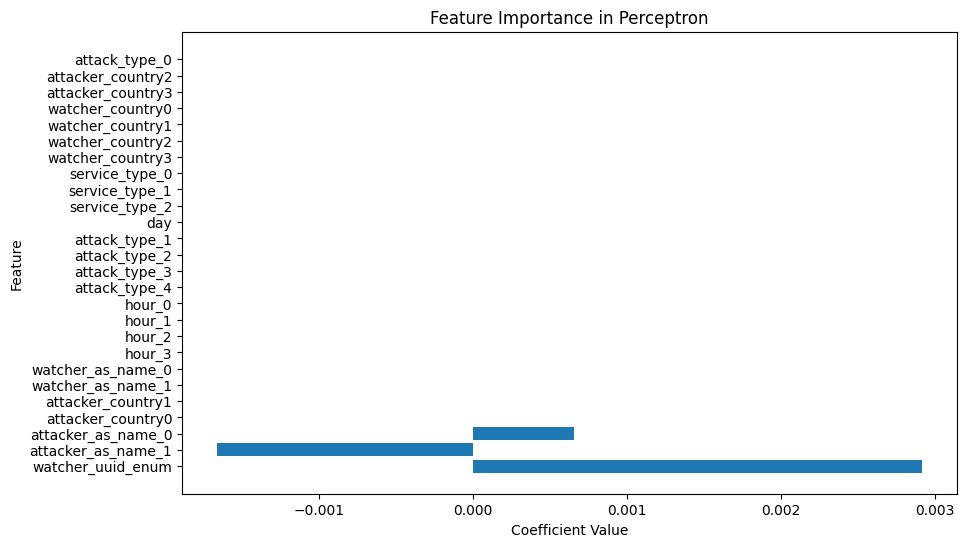

In [ ]:
coefficients = best_model.coef_[0]
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Perceptron')
plt.show()

In [ ]:
perceptron = Perceptron(random_state=10, alpha=best_params['alpha'], eta0=best_params['eta0'], penalty=best_params['penalty'])
perceptron.fit(X_train_scaled, y_train)

y_pred = perceptron.predict(X_validation_scaled)

f1 = f1_score(y_validation, y_pred)
print(f"F1 Score on validation Set: {f1}")

F1 Score on validation Set: 0.7549191256859118


## Preparo test

In [ ]:
X_test_scaled = scaler.transform(X_test)

y_test_pred = perceptron.predict(X_test_scaled)

result_df = pd.DataFrame({'attacker_ip_enum': X_test['attacker_ip_enum'], 'label': y_test_pred})

grouped_df = result_df.groupby('attacker_ip_enum')['label'].mean()


In [ ]:
X_test.columns

Index(['watcher_uuid_enum', 'day', 'attacker_country0', 'attacker_country1',
       'attacker_country2', 'attacker_country3', 'watcher_country0',
       'watcher_country1', 'watcher_country2', 'watcher_country3',
       'service_type_0', 'service_type_1', 'service_type_2', 'attack_type_0',
       'attack_type_1', 'attack_type_2', 'attack_type_3', 'attack_type_4',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'watcher_as_name_0',
       'watcher_as_name_1', 'attacker_as_name_0', 'attacker_as_name_1',
       'attacker_ip_enum'],
      dtype='object')

In [ ]:
X_test = X_test.drop('attacker_ip_enum', axis=1)


In [ ]:
X_train = X_train.drop('attacker_ip_enum', axis=1)
X_validation = X_validation.drop('attacker_ip_enum', axis=1)

In [ ]:
ips.reset_index(drop=True, inplace=True)
ips_validation.reset_index(drop=True, inplace=True)


In [ ]:
ips_test.reset_index(drop=True, inplace=True)

In [ ]:
X_train = X_train.join(ips)
X_validation = X_validation.join(ips_validation)

In [ ]:
X_test = X_test.join(ips_test)

In [ ]:
grouped_df = result_df.groupby('attacker_ip_enum')['label'].mean()

In [ ]:
pd.DataFrame(grouped_df)

In [ ]:
threshold = 0.5
grouped_labels = (grouped_df >= threshold).astype(int)

In [ ]:
grouped_df = grouped_df.reset_index()

In [ ]:
pd.DataFrame(grouped_labels)

In [ ]:
grouped_labels.to_csv('/content/drive/MyDrive/orga/04 - Organización de Datos/TP2/resultado_perceptron.csv')

# Score de Kaggle

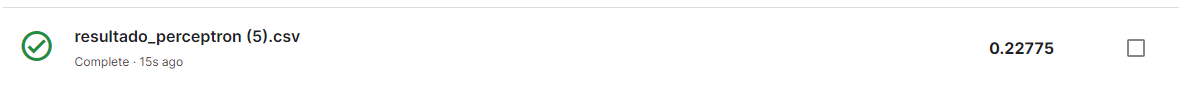